In [1]:
import requests
import pandas as pd
from glob import glob
import math
import matplotlib.pyplot as plt
import numpy as np


#Downloading and setting up
url = "http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv"
response = requests.get(url)

fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

-----------------
Downloaded API_SI.POV.DDAY_DS2_en_csv_v2_10474275.zip


In [3]:
#unzipping file
import zipfile
#extracting the zip file
zipfile.ZipFile(fname, 'r').extractall('.')

In [5]:
#Getting the file and removing the first 4 lines
local_file = glob('./*API_SI*.csv')[0]
df= pd.read_csv(local_file, skiprows=4)

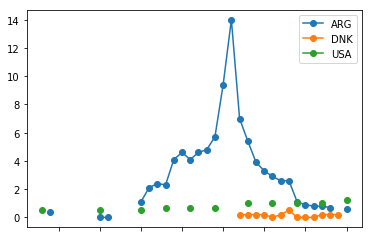

In [6]:
#EXERCISE 1

#Create a line graph showing the development in poverty over time in both Argentina,
#Ivory cost, USA.

#Could not find Ivory coast, so i used DK instead :)

#finding the index and country code of the countries
c_code_df = df[df['Country Name'].isin(['United States', 
                                        'Denmark', 'Argentina'])]['Country Code']
#plotting them using pandas tools
ts_df = df.iloc[c_code_df.index, 5:-1].T
ts_df = ts_df.rename(columns=dict(c_code_df))


ts_df.plot(style="o-")

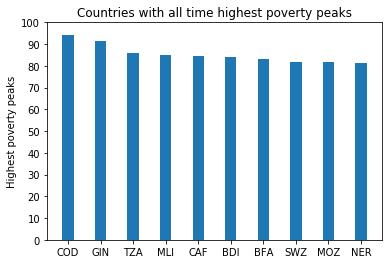

In [67]:
#EXERCISE 2
#Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

#getting all the countries, and flipping them using T
countries = df.iloc[df.index, 5:-1].T
countries = countries.rename(columns=dict(df['Country Code']))

#Dict comprehension to get the max index value for poverty for each coutnry
max_years = {n: countries[n].idxmax() for n in df['Country Code']}
#Filtering out all NaN values
max_years_filtered = {n: max_years[n] for n in max_years if not math.isnan(float(max_years[n]))}

#changing the indexes into actual values
data = {n: countries[n][v] for n,v in max_years_filtered.items()}
#sorting the list, and only taking out the top 10
top10 = dict(sorted(data.items(), key=lambda x: x[1], reverse=True)[:10])

#Time to plot! :))))
ind = list(range(0,len(top10.items())))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, top10.values(), width)

plt.ylabel('Highest poverty peaks')
plt.title('Countries with all time highest poverty peaks')
plt.xticks(ind, top10.keys())
plt.yticks(np.arange(0, 101, 10))

plt.show()    

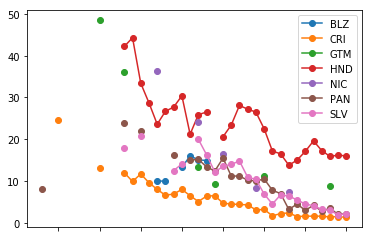

In [64]:
#EXERCISE 3
#Show the development of absolute poverty in all the central american countries

#I chose to plot them using o's so you can see the development, even when there are years that have no data
#showing it with this tools allows you to have a good overall understanding of the way
#the poverty is going


#extracting the data
ca_df = df[df['Country Name'].isin(['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama'])]['Country Code']

#drawing it using pandas tools like assignment 1
draw = df.iloc[ca_df.index, 5:-1].T
draw = ts_df.rename(columns=dict(ca_df))


draw.plot(style="o-")

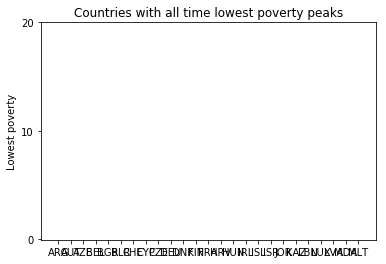

In [82]:
#EXERCISE 4
#Show bar graph with countries all time lowest poverty, Example: Denmarks lowest poverty rate ever
#was 0.0..
#Adjust the below variable to see more countries
#Intially the bar will be completely empty, due to the fact
#that the top 25 lowest poverty in all countries is 0.0, but it will increase
#if you increase the below variable


#Total amount of countries
totalCountriesShown = 25

#extracting data
countries = df.iloc[df.index, 5:-1].T
countries = countries.rename(columns=dict(df['Country Code']))

#finding the indexes of which each country had the lowest amount of poverty
min_years = {n: countries[n].idxmin() for n in df['Country Code']}

#filtering out NaN
min_years_filtered = {n: min_years[n] for n in min_years if not math.isnan(float(min_years[n]))}

#Changing indexes for values
data = {n: countries[n][v] for n,v in min_years_filtered.items()}

#showing the top 25, in this case, all countries have 0.0, but will increase if you make the first variable larger
top25 = dict(sorted(data.items(), key=lambda x: x[1])[:totalCountriesShown])


#Plotting it, i prefer to use PLT as it has more options than pandas draw libary
ind = list(range(0,len(top25.items())))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, top25.values(), width)

plt.ylabel('Lowest poverty')
plt.title('Countries with all time lowest poverty peaks')
plt.xticks(ind, top25.keys())
plt.yticks(np.arange(0, 25, 10))

plt.show()  